# Proyecto final

Este notebook tiene como proposito mostrar un pequeño ejemplo del doble descenso, acá implementaresmo un modelo de regresión lineal a partir del código contenido en el siguiente repositorio: 

https://github.com/RylanSchaeffer/Stanford-AI-Alignment-Double-Descent-Tutorial

Este repositorio contiene los resultados presentados en el paper:

https://arxiv.org/abs/2303.14151

Integrantes del grupo:


*   David Garzón 
*   Santiago Pardo
*   Laura García 



In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from itertools import product
import scipy.special
import matplotlib.animation as animation
import imageio
from IPython.display import display, Video, Image

## Modelo Underparametrized and Overparametrized

Para este caso vamos a ver qué pasa con el modelo cuando vamos aumentando los parametros.


end


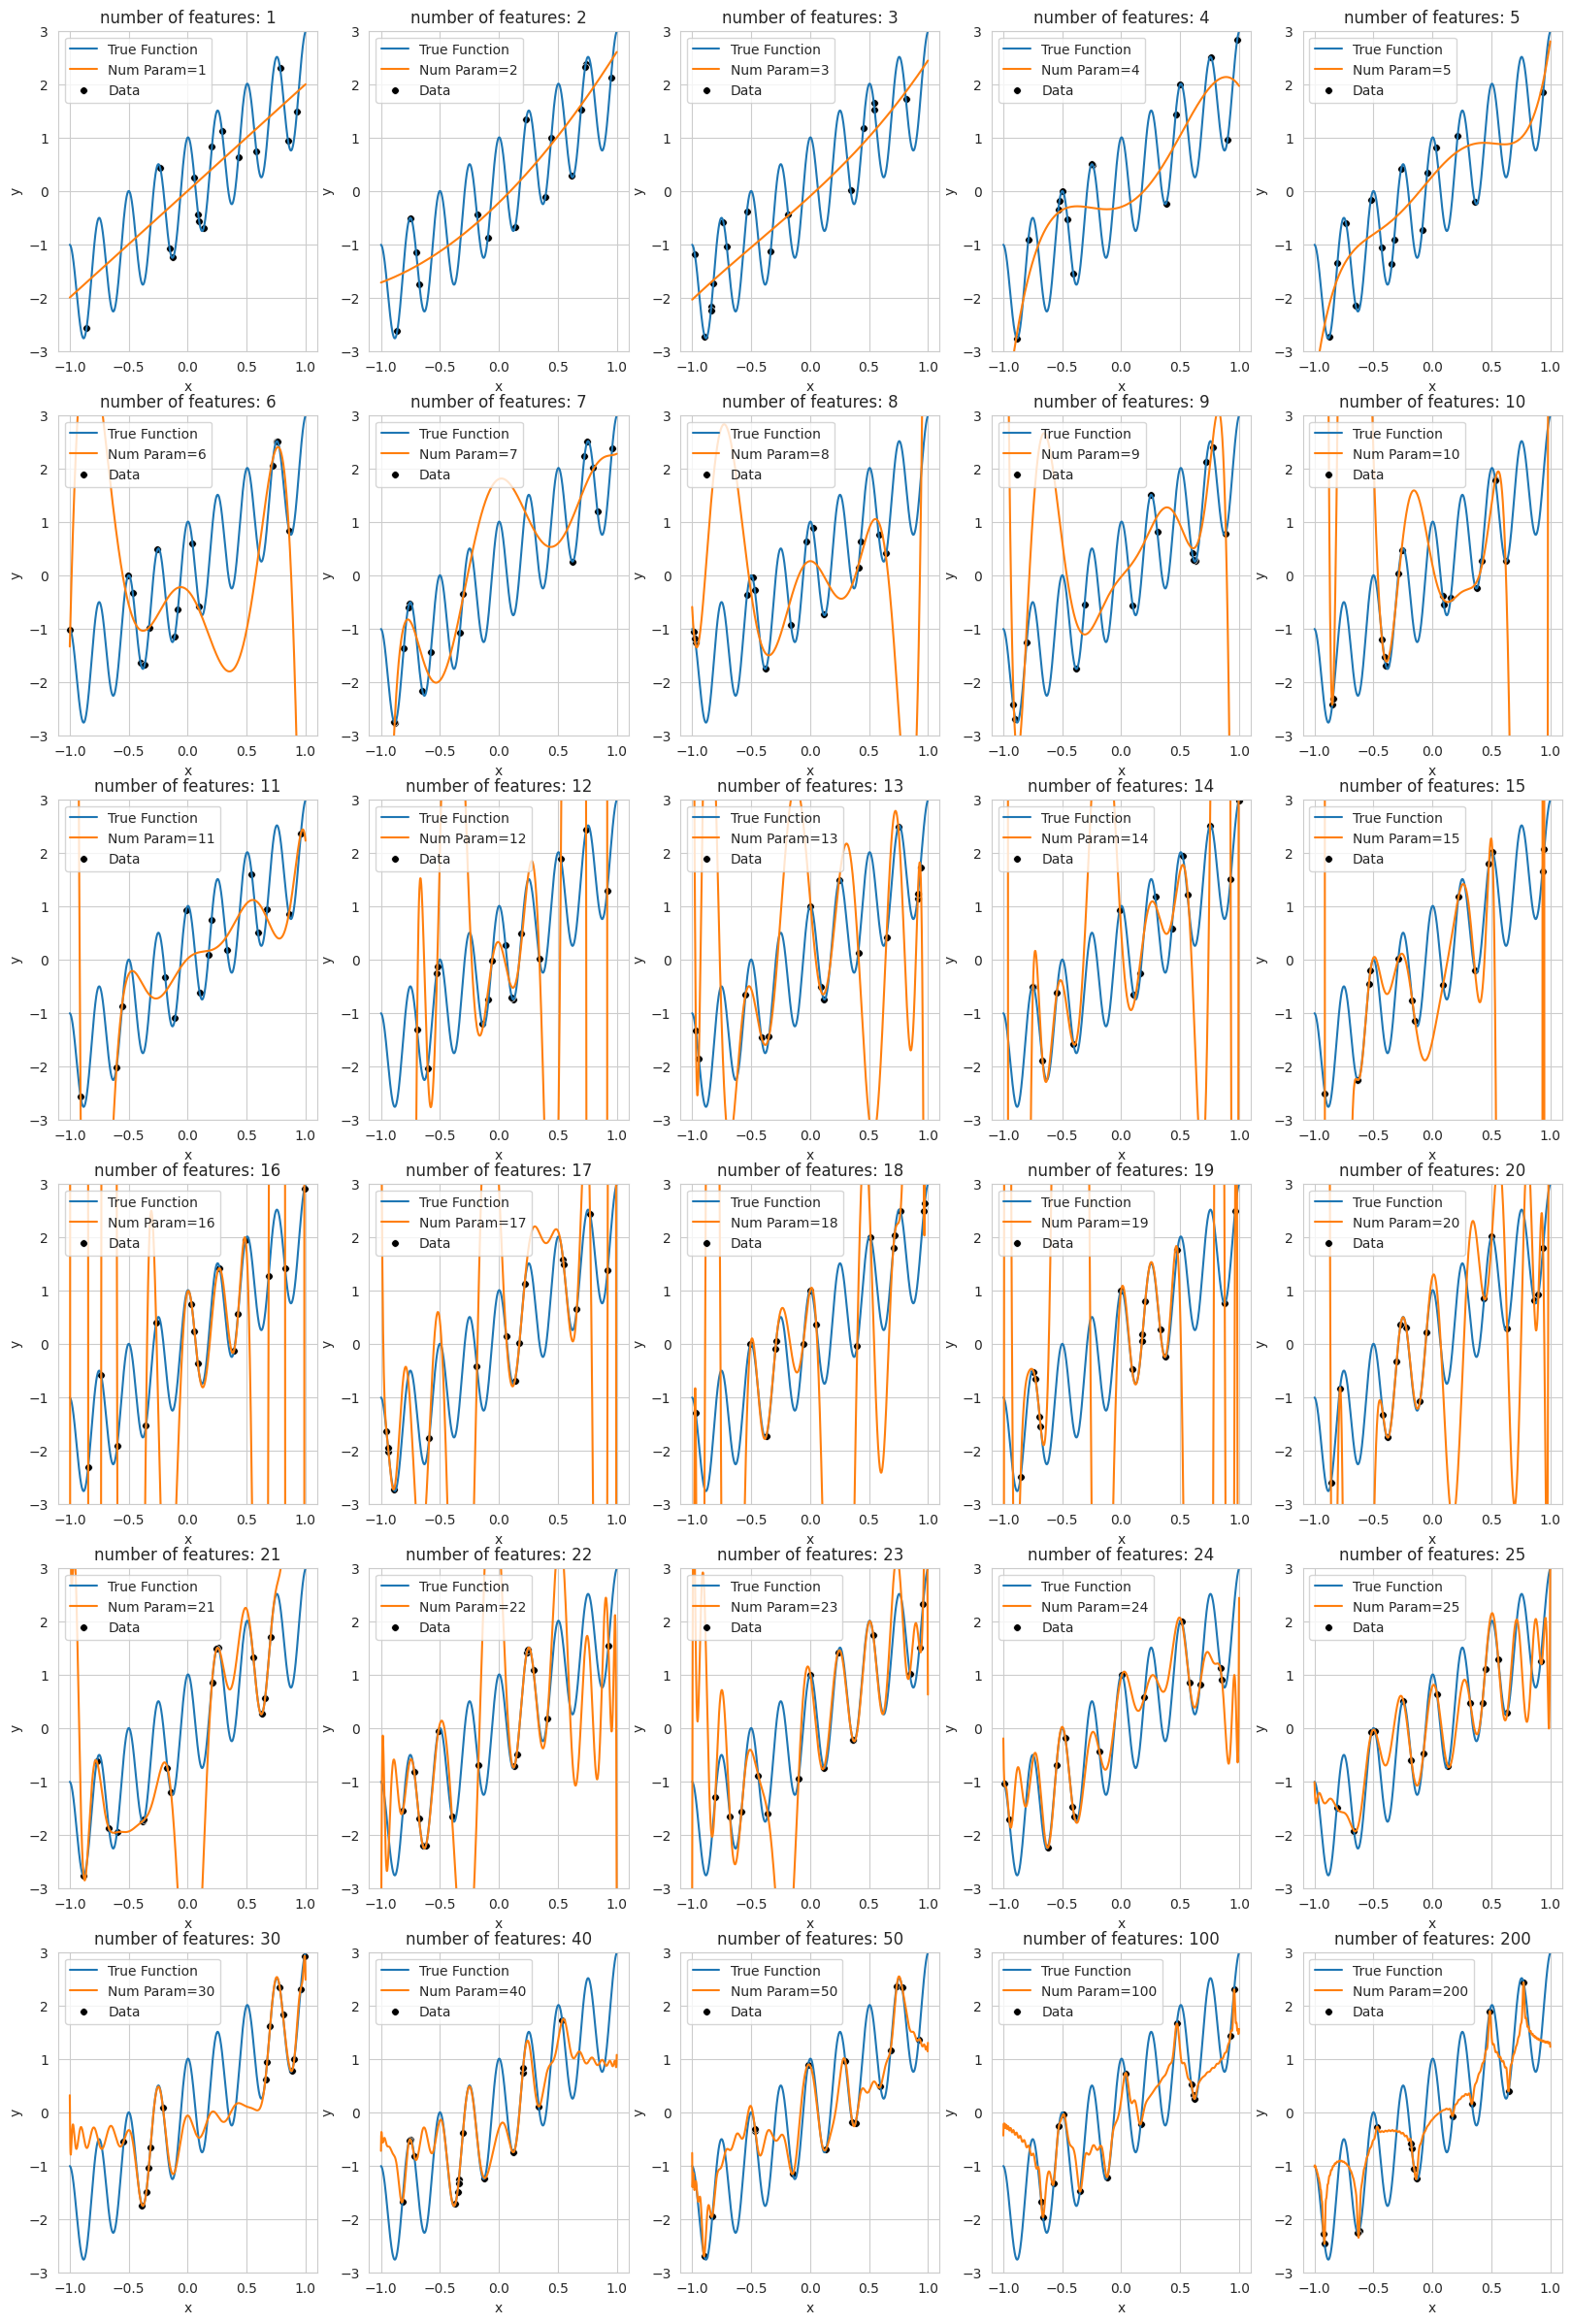

In [ ]:

# Set style
sns.set_style("whitegrid")

# Set seed for reproducibility.
np.random.seed(0)


#Controla el número de datos con los que vamos a hacer la regresión 
num_data_list = [15]

num_features_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 
                    17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 40, 50, 100, 200]

#num_features_list = [1,2,3,4]
num_repeat_list = list(range(10)) # se demora mucho si aumentamos 

results_dir = 'results/polynomial_regression'
gif_dir = 'gif'
os.makedirs(results_dir, exist_ok=True)

# Sacamos el modelo de Sklearn
regr = linear_model.LinearRegression(fit_intercept=True)

def compute_y_from_x(X: np.ndarray):
    return np.add(2. * X, np.cos(X * 25))[:, 0]

# Configuramos el plot
fig, axs = plt.subplots(6, 5)
fig.set_figheight(30)
fig.set_figwidth(20)
plot2 = plt.plot()
low, high = -1., 1.
gif = True

#Primero generamos los datos que vamos a usar
for num_data in num_data_list:
    mse_list = []
    results_num_data_dir = os.path.join(results_dir, f'num_data={num_data}')
    os.makedirs(results_num_data_dir, exist_ok=True)
    X_test = np.linspace(start=low, stop=high, num=1000).reshape(-1, 1)
    y_test = compute_y_from_x(X_test)

    #Plot the data.
    #sns.lineplot(x=X_test[:, 0], y=y_test, label='True Function')
    #sns.scatterplot(x=X_train[:, 0], y=y_train, s=30, color='k', label='Data')
    #plt.xlabel('x')
    #plt.ylabel('y')


    #for extension in ['png']:
    #    plt.savefig(os.path.join(results_num_data_dir, f'data.{extension}'),
    #                bbox_inches='tight',
    #                dpi=300)
        
    subplot_var = 0
    for num_features in num_features_list:
        flag = True
        results_num_features_dir = os.path.join(results_num_data_dir, f'num_features={num_features}')
        os.makedirs(results_num_features_dir, exist_ok=True)
        os.makedirs(gif_dir, exist_ok=True)
        feature_degrees = 1 + np.arange(num_features).astype(int)

        for repeat_idx in num_repeat_list:
            # Creamos los samples para el entrenamiento
            X_train = np.random.uniform(low=low, high=high, size=(num_data, 1))
            y_train = compute_y_from_x(X_train)

            # Generamos el polinomio de la regresión 
            X_train_poly = scipy.special.eval_legendre(
                feature_degrees,
                X_train)
            X_test_poly = scipy.special.eval_legendre(
                feature_degrees,
                X_test)
            
            beta_hat = np.linalg.pinv(X_train_poly) @ y_train
            y_train_pred = X_train_poly @ beta_hat
            y_test_pred = X_test_poly @ beta_hat

            # Medimos el error del polinomio
            train_mse = mean_squared_error(y_train, y_train_pred)
            test_mse = mean_squared_error(y_test, y_test_pred)

            # Acá guardamos la información del modelo entrenado y evaluado
            mse_list.append({
                'Num. Data': num_data,
                'Num. Parameters (Num Features)': num_features,
                'repeat_idx': 0,
                'Train MSE': train_mse,
                'Test MSE': test_mse,
            })
            #print(f'num_data={num_data}, num_features={num_features}, repeat_idx={0}, train_mse={train_mse:.4f}, test_mse={test_mse:.4f}')

            # Plot the polynomial fit data.
            
            if flag:
              #Subplots de la supergráfica
              sns.lineplot(x=X_test[:, 0], y=y_test, label='True Function',
                          ax=axs[subplot_var//5, subplot_var%5]);
              sns.lineplot(x=X_test[:, 0], y=y_test_pred, label=f'Num Param={X_train_poly.shape[1]}',
                          ax=axs[subplot_var//5, subplot_var%5]);
              sns.scatterplot(x=X_train[:, 0], y=y_train, s=30, color='k', label='Data',
                              ax=axs[subplot_var//5, subplot_var%5]);
              axs[subplot_var//5, subplot_var%5].set(xlabel='x', ylabel='y');
              axs[subplot_var//5, subplot_var%5].set_ylim(-3, 3);
              title = f'number of features: {num_features}';
              axs[subplot_var//5, subplot_var%5].set_title(title);
              axs[subplot_var//5, subplot_var%5].legend(loc="upper left");
              #print([subplot_var//5, subplot_var%5])


              # Guardamos los subplots como imagenes  
              extent = axs[subplot_var//5, subplot_var%5].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
              plt.savefig(os.path.join(gif_dir, f'gif_img_{subplot_var}.png'),
                                bbox_inches=extent.expanded(1.25, 1.2),
                              dpi=200);




              # Prevenimos que la variable del subplot se actualice si no cambia
              # número de parametros
              flag = False
              subplot_var += 1
              data = plt


        mse_df = pd.DataFrame(mse_list)
        mse_df.to_csv(os.path.join(results_num_data_dir, 'mse.csv'), index=False)
print("end")

In [ ]:
#Creamos un gif para que se pueda ilustrar mejor 
frames = []

for t in range(len(num_features_list)):
    image = imageio.v2.imread(os.path.join(gif_dir, f'gif_img_{t}.png'))[:792,:625]
    frames.append(image)

imageio.mimsave('./regre.gif', 
                frames,          
                fps = 1)  

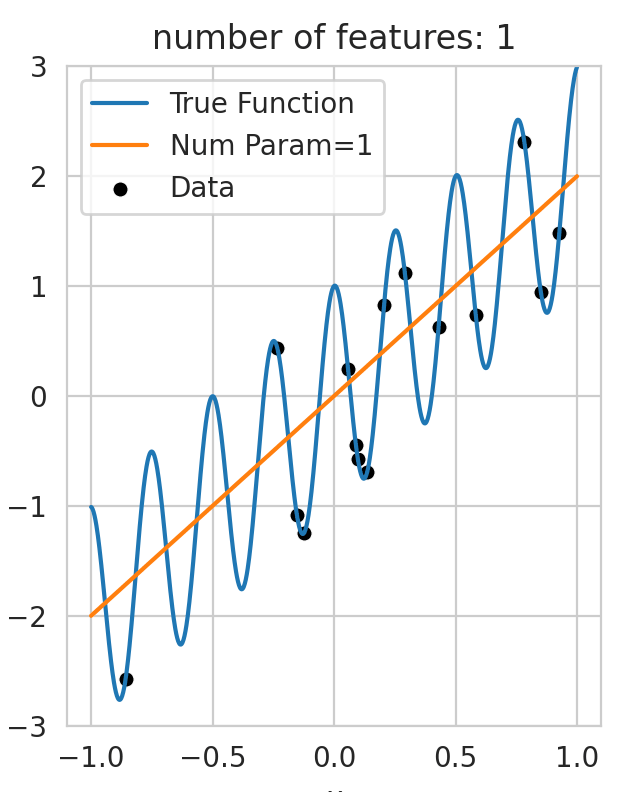

In [ ]:
image = Image(open('regre.gif','rb').read())
display(image)

Ahora veamos qué pasa con los datos

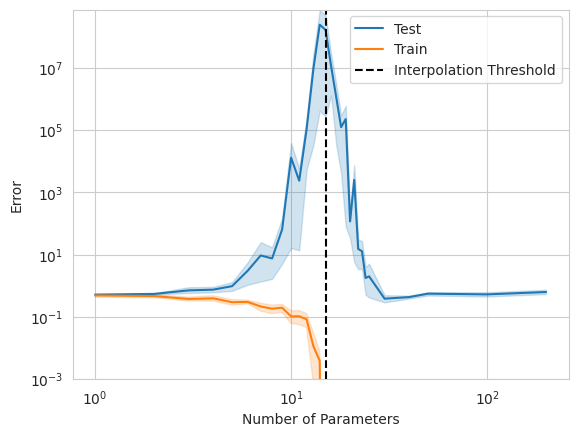

In [ ]:

# Mostramos los datos previamente obtenidos
sns.lineplot(data=mse_df,
              x='Num. Parameters (Num Features)',
              y='Test MSE',
              label='Test',
              )
sns.lineplot(data=mse_df,
              x='Num. Parameters (Num Features)',
              y='Train MSE',
              label='Train',
              )
plt.ylabel('Error')
plt.xlabel('Number of Parameters')
plt.ylim(bottom=1e-3)
plt.yscale('log')
plt.xscale('log')
#plt.title('Polynomial Regression')
plt.axvline(x=num_data,
            color='black',
            linestyle='--',
            label='Interpolation Threshold')
plt.legend()
ax = plt.gca()
for extension in ['png']:
    plt.savefig(os.path.join(results_num_data_dir, f'mse_num_data={num_data}.{extension}'),
                bbox_inches='tight',
                dpi=300)
plt.show()

## Doble decenso

In [ ]:
# Configura el estilo
sns.set_style("whitegrid")

# Dejamos una seed fija para poder reproducior los resultados
np.random.seed(0)


# Create sklearn linear regression object
regr = linear_model.LinearRegression(fit_intercept=False)

# Función para cargar el datset
def load_who_life_expectancy(**kwargs):
    # Fuente del dataset 
    # https://www.kaggle.com/kumarajarshi/life-expectancy-who

    life_expectancy_df = pd.read_csv('Life Expectancy Data.csv')
    life_expectancy_df.dropna(inplace=True)

    X = life_expectancy_df[[
        'Adult Mortality',
        'infant deaths',
        'Alcohol',
        'percentage expenditure',
        'Hepatitis B',
        'Measles ',
        ' BMI ',
        'under-five deaths ',
        'Polio',
        'Total expenditure',
        'Diphtheria ',
        ' HIV/AIDS',
        'GDP',
        'Population',
        ' thinness  1-19 years',
        ' thinness 5-9 years',
        'Schooling']].values
    y = life_expectancy_df['Life expectancy '].values

    return X, y



# Dirección de las imágenes 
results_dir = 'results/real_data'
os.makedirs(results_dir, exist_ok=True)

num_repeats = 30

dataset_name = 'results/real_data/'
dataset_fn = load_who_life_expectancy

#print('On dataset:', dataset_name)

# Load the diabetes dataset
X, y = dataset_fn(return_X_y=True)

dataset_loss_df = []
for repeat_idx in range(num_repeats):

    # subset_sizes = np.arange(10, X_train.shape[0], X_train.shape[0] // 20)
    subset_sizes = np.arange(1, 50, 1)
    for subset_size in subset_sizes:

        #print(f'Dataset: {dataset_name}, repeat_idx: {repeat_idx}, subset_size: {subset_size}')

        # Split the data into training/testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            random_state=repeat_idx,
            test_size=X.shape[0] - subset_size,
            shuffle=True)

        regr.fit(X_train, y_train)
        min_singular_value = np.min(np.linalg.svd(X_train,
                                                  full_matrices=False,
                                                  compute_uv=False))
        y_train_pred = regr.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        y_test_pred = regr.predict(X_test)
        test_mse = mean_squared_error(y_test, y_test_pred)

        # Compute the fraction of the last training datum that lies outside the subspace
        # of the all other training data.
        last_train_datum = X_train[-1, :]
        other_train_data = X_train[:-1, :]
        if other_train_data.shape[0] == 0:
            fraction_outside = 1.
        else:
            projection_of_last_train_datum_onto_other_train_data = np.linalg.pinv(other_train_data).T @ last_train_datum @ other_train_data
            fraction_outside = np.linalg.norm(last_train_datum - projection_of_last_train_datum_onto_other_train_data) / np.linalg.norm(last_train_datum)

        dataset_loss_df.append({
            'Dataset': dataset_name,
            'Subset Size': subset_size,
            'Train MSE': train_mse,
            'Test MSE': test_mse,
            'Repeat Index': repeat_idx,
            'Smallest Non-Zero Singular Value': min_singular_value,
            'Fraction Outside': fraction_outside
        })


## Resultados del experimento

En el siguiente código mostramos los resultados del experimento.

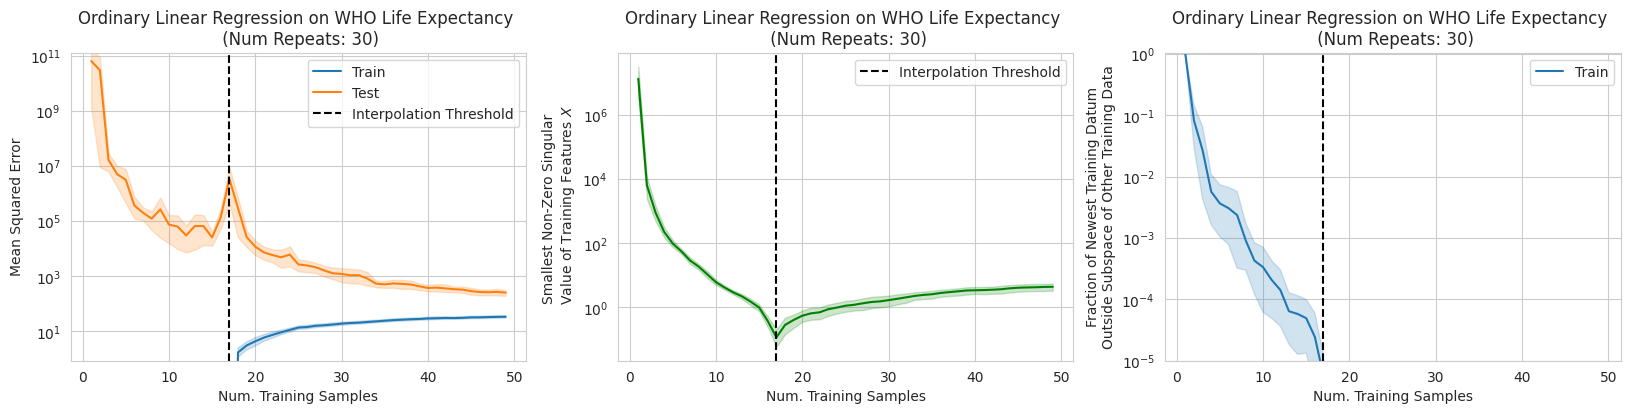

In [ ]:
# Nos tomamos una libertades creativas 
# cambiamos la manera de mostrar los resultados
dataset_loss_df = pd.DataFrame(dataset_loss_df)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(4)
fig.set_figwidth(20)

sns.lineplot(
    data=dataset_loss_df,
    x='Subset Size',
    y='Train MSE',
    label='Train',
    ax=ax1
)
sns.lineplot(
    data=dataset_loss_df,
    x='Subset Size',
    y='Test MSE',
    label='Test',
    ax=ax1
)

ax1.set(xlabel='Num. Training Samples', ylabel='Mean Squared Error')
ax1.axvline(x=X.shape[1], 
             color='black', 
             linestyle='--', 
             label='Interpolation Threshold')
title = f'Ordinary Linear Regression on WHO Life Expectancy \n (Num Repeats: {num_repeats})'
ax1.set_title(title)
ax1.set_yscale('log')
ymax = 2 * max(dataset_loss_df.groupby('Subset Size')['Test MSE'].mean().max(),
                  dataset_loss_df.groupby('Subset Size')['Train MSE'].mean().max())

ymin = 0.5 * dataset_loss_df.groupby('Subset Size')['Train MSE'].mean()[X.shape[1] + 1]
ax1.set_ylim(bottom=ymin, top=ymax)
ax1.legend(loc="upper right")



sns.lineplot(
    data=dataset_loss_df,
    x='Subset Size',
    y='Smallest Non-Zero Singular Value',
    color='green',
    ax=ax2
)

ax2.set(xlabel='Num. Training Samples', ylabel='Smallest Non-Zero Singular \n Value of Training Features ' + r'$X$')
ax2.axvline(x=X.shape[1], color='black', linestyle='--', label='Interpolation Threshold')
ax2.set_title(title)
ax2.set_yscale('log')
ax2.legend()



sns.lineplot(
    data=dataset_loss_df,
    x='Subset Size',
    y='Fraction Outside',
    label='Train',
    ax=ax3
)
ax3.set_ylim(bottom=1e-5)
ax3.set(xlabel='Num. Training Samples', ylabel='Fraction of Newest Training Datum\nOutside Subspace of Other Training Data')
ax3.axvline(x=X.shape[1], color='black', linestyle='--', label='Interpolation Threshold')
ax3.set_title(title)
ax3.set_yscale('log')